In [1]:
import tensorflow as tf
from agent.main import Agent
from emulator.main import Account
from params import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#### 完全随机探索填充经验库

In [2]:
env = Account()
agent = Agent()
# fill cache
for episode in range(2):
    state = env.reset()
    while True:
        action = agent.get_stochastic_policy(state, 0)
        next_state, reward, done = env.step(action)
        agent.update_cache(state, action, reward, next_state, done)
        state = next_state
        if done:
            break
print(len(agent.agent.cache))

2048


#### 训练模型

0 129285.409067
1 155325.939548
2 200299.421097
3 193038.696306
4 239591.793298
5 256011.023411
6 268853.004745
7 280514.332691
8 303613.812299
9 293471.265307


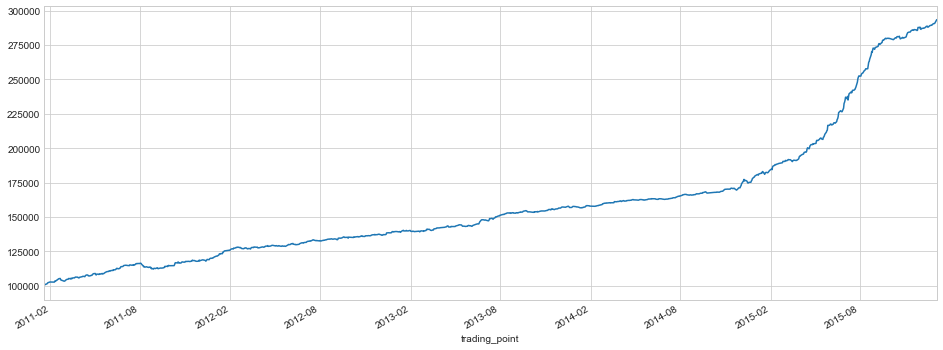

In [3]:
NUM_EPISODES = 10

episodes_train = []
global_step = 0
for episode in range(NUM_EPISODES):
    state = env.reset()
    episode_step = 0
    while True:
        global_step += 1
        episode_step += 1

        action = agent.get_stochastic_policy(state)
        next_state, reward, done = env.step(action)
        agent.update_cache(state, action, reward, next_state, done)
        state = next_state

        if global_step % TARGET_STEP_SIZE == 0:
            agent.update_target()

        if episode_step % TRAIN_STEP_SIZE == 0 or done:
            agent.update_eval()

            if done:
                print(episode, env.A.total_value)
                episodes_train.append(env.plot_data())
                break

tmp = env.plot_data()
tmp.iloc[:, 0].plot(figsize=(16, 6))
agent.save_model()

#### 测试算法

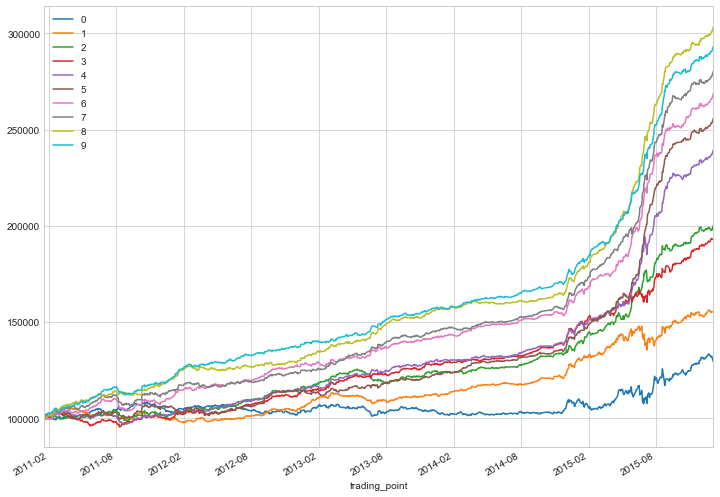

In [4]:
episode_value = [i["value"] for i in episodes_train]
episode_value = pd.concat(episode_value, axis=1)
episode_value.columns = list(range(episode_value.shape[1]))
episode_value.plot(figsize=(12, 9))

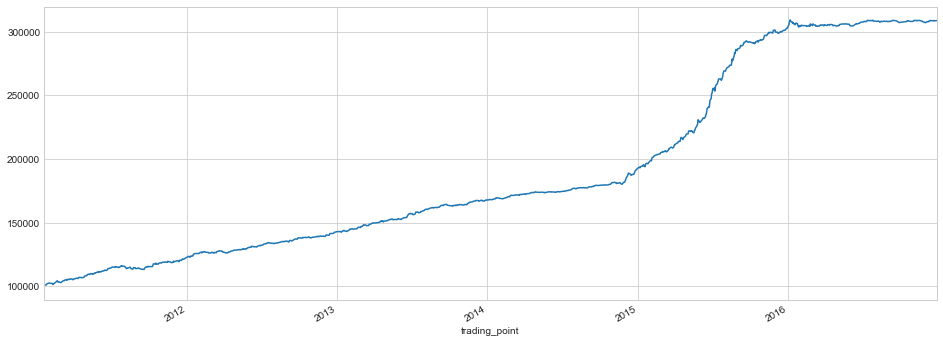

In [5]:
state = env.reset()
for i in range(1445):
    action = agent.get_stochastic_policy(state)
    next_state, reward, done = env.step(action)
    state = next_state

tmp = env.plot_data()
tmp.iloc[:, 0].plot(figsize=(16, 6))

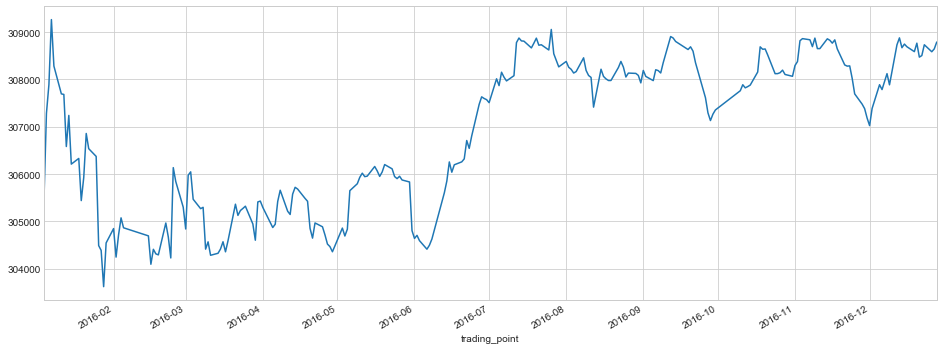

In [6]:
tmp.iloc[1203:, 0].plot(figsize=(16, 6))

#### 继续训练

INFO:tensorflow:Restoring parameters from model/ddqn.ckpt
0 305969.019185
1 296885.090924
2 314495.755748
3 330705.099699
4 332554.716914
5 343580.953714
6 334767.373049
7 327727.206608
8 338477.252834
9 337379.98773
10 350099.2577
11 357298.914069
12 358732.902911
13 361747.443897
14 360049.668097
15 338844.886457
16 344843.116577
17 362760.397236
18 361822.958613
19 364521.842898
20 371185.367259
21 367965.464033
22 374923.232031
23 366483.865857
24 350404.503759
25 380067.713115
26 366588.391349
27 365717.288956
28 372432.269562
29 375173.692649
30 377192.045029
31 365639.161042
32 381244.18921
33 377702.21812
34 376915.32017
35 400433.023658
36 389607.865325
37 398013.023334
38 391225.882637
39 383281.706963
40 396791.555476
41 387641.950133
42 394821.473207
43 404463.675754
44 401372.359312
45 394467.783514
46 404079.806721
47 384219.657554
48 405922.023195
49 402139.881513
50 400465.174227
51 419912.301379
52 419657.729645
53 409316.354628
54 394882.44859
55 394036.050544
56 4040

461 465313.506647
462 461741.931969
463 464352.288828
464 455842.418502
465 452420.311392
466 458686.441419
467 461502.176473
468 461709.672364
469 453031.635574
470 461541.674905
471 461536.586414
472 466448.006916
473 461545.029908
474 458833.592983
475 451760.068653
476 456523.718096
477 441693.305587
478 459384.202394
479 465440.9933
480 459503.926505
481 456338.259349
482 459357.536579
483 465319.568457
484 460424.947921
485 466601.890136
486 432381.367624
487 466274.17858
488 449208.976385
489 459195.194109
490 449422.018095
491 443932.265156
492 465923.391791
493 455198.30441
494 453528.734073
495 457353.399441
496 449229.348832
497 463850.210192
498 467786.42046
499 440610.480735
500 454907.788227
501 452877.652249
502 455073.231323
503 449837.443408
504 453314.91354
505 461759.720981
506 459453.382476
507 448617.212173
508 462330.651749
509 447064.919939
510 446329.565708
511 455730.828403
512 452245.132304
513 458222.664041
514 453746.926927
515 453254.315871
516 446503.05447

920 482888.965237
921 464059.949852
922 468592.428025
923 470099.510776
924 469236.882337
925 464309.585567
926 462587.804664
927 476099.128352
928 444318.044678
929 452511.448325
930 468095.55201
931 458802.865123
932 463960.75901
933 475150.335814
934 465492.669514
935 473444.144985
936 447318.818759
937 459075.828247
938 463739.983051
939 451518.115594
940 471713.763888
941 451808.200112
942 443575.261856
943 469528.739792
944 460573.817136
945 451658.370347
946 457639.056983
947 469931.41386
948 479724.970377
949 460636.777035
950 469874.573307
951 460913.104208
952 467181.401912
953 466149.66598
954 453216.825007
955 463391.822064
956 451697.783757
957 453245.892403
958 470268.466109
959 455609.640315
960 451701.154269
961 472574.744083
962 461804.061868
963 467446.96385
964 469438.832502
965 463149.788906
966 449154.111988
967 459544.287152
968 461652.810407
969 441619.811438
970 470233.88891
971 461997.551723
972 468958.333499
973 448154.490024
974 454609.849946
975 457621.20531

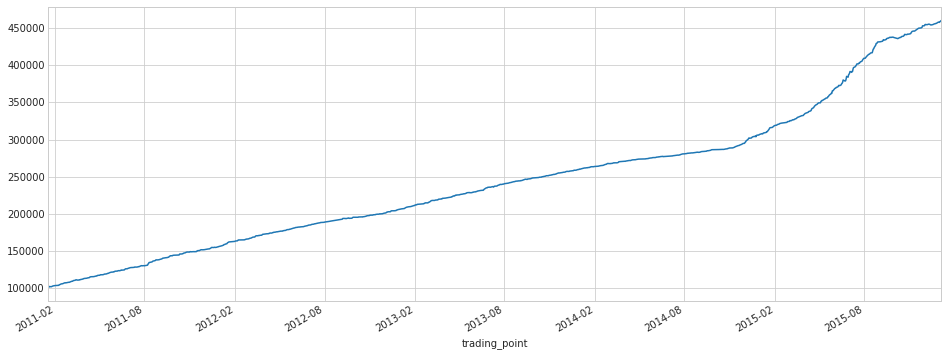

In [8]:
agent.restore_model()

NUM_EPISODES = 1000
global_step = 0
for episode in range(NUM_EPISODES):
    state = env.reset()
    episode_step = 0
    while True:
        global_step += 1
        episode_step += 1

        action = agent.get_stochastic_policy(state)
        next_state, reward, done = env.step(action)
        agent.update_cache(state, action, reward, next_state, done)
        state = next_state

        if global_step % TARGET_STEP_SIZE == 0:
            agent.update_target()

        if episode_step % TRAIN_STEP_SIZE == 0 or done:
            agent.update_eval()

            if done:
                print(episode, env.A.total_value)
                episodes_train.append(env.plot_data())
                break

tmp = env.plot_data()
tmp.iloc[:, 0].plot(figsize=(16, 6))
agent.save_model()

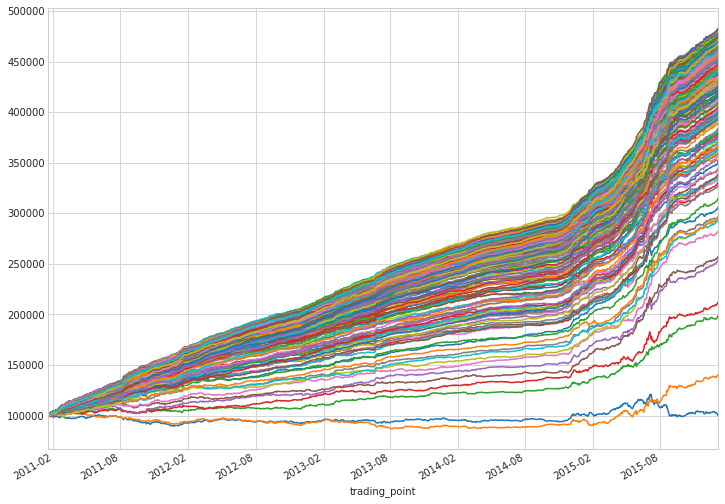

In [29]:
episode_value = [i["value"] for i in episodes_train]
episode_value = pd.concat(episode_value, axis=1)
episode_value.columns = list(range(episode_value.shape[1]))
episode_value.plot(figsize=(12, 9), legend=False)
plt.savefig("样本内.png")

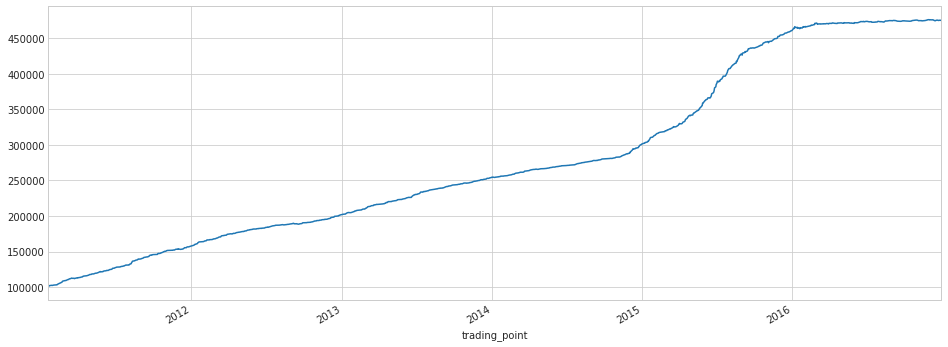

In [10]:
state = env.reset()
for i in range(1445):
    action = agent.get_stochastic_policy(state)
    next_state, reward, done = env.step(action)
    state = next_state

tmp = env.plot_data()
tmp.iloc[:, 0].plot(figsize=(16, 6))

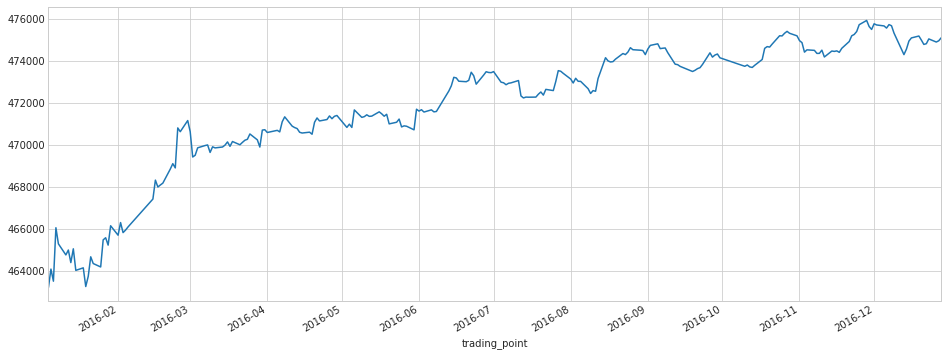

In [28]:
tmp.iloc[1203:, 0].plot(figsize=(16, 6))
plt.savefig("样本外.png")

In [27]:
test_data = tmp.iloc[1203:]

ratio = np.sum(np.maximum(np.sign(test_data['reward']), 0))/test_data.shape[0]
print("胜率:", ratio)

胜率: 0.5413223140495868
